In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Picture.jpg',0)
img1 = cv2.imread('Picture.jpg',1)
imgall = cv2.imread('Picture.jpg')
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
edges = cv2.Canny(img, 100, 200)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

<IPython.core.display.Javascript object>


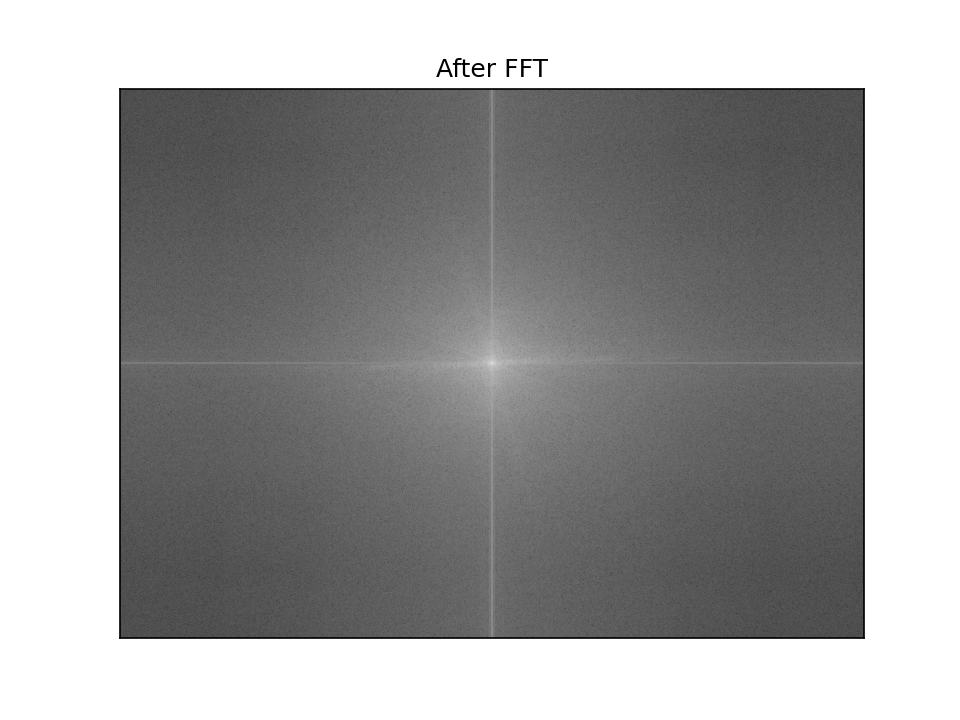

In [2]:
%matplotlib notebook
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
#plt.show()
plt.savefig('AfterFFT.png')

<IPython.core.display.Javascript object>


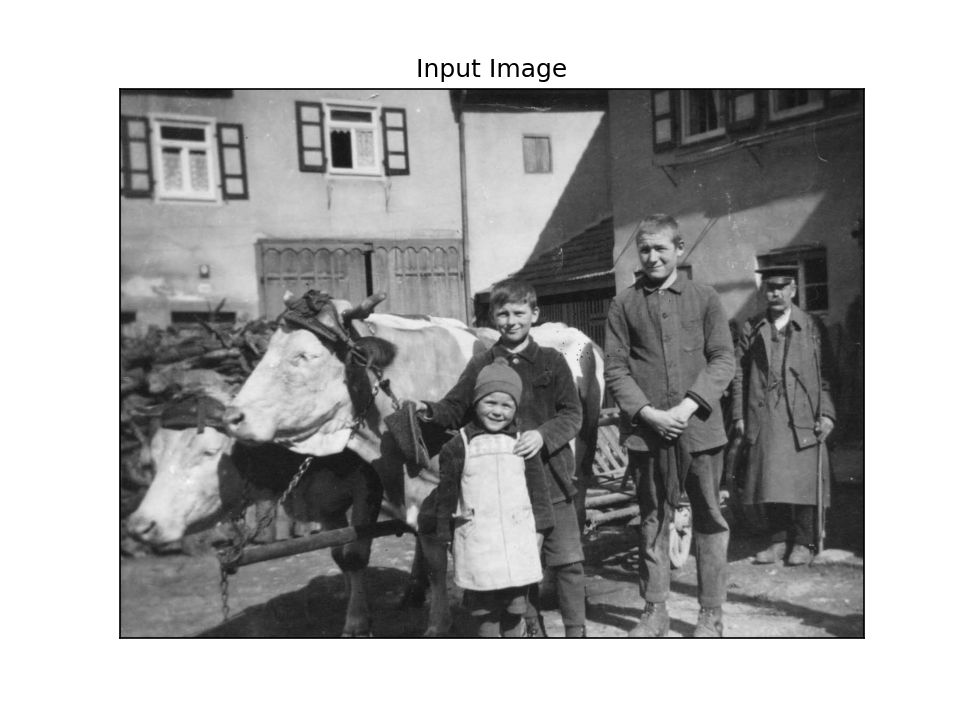

In [11]:
%matplotlib notebook
plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.show()
plt.savefig('InputImage.png')

/var/folders/_g/q__xsyh10ns0l94mkn0pmp3w0000gn/T/ipykernel_27874/3057865327.py:19: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


<IPython.core.display.Javascript object>


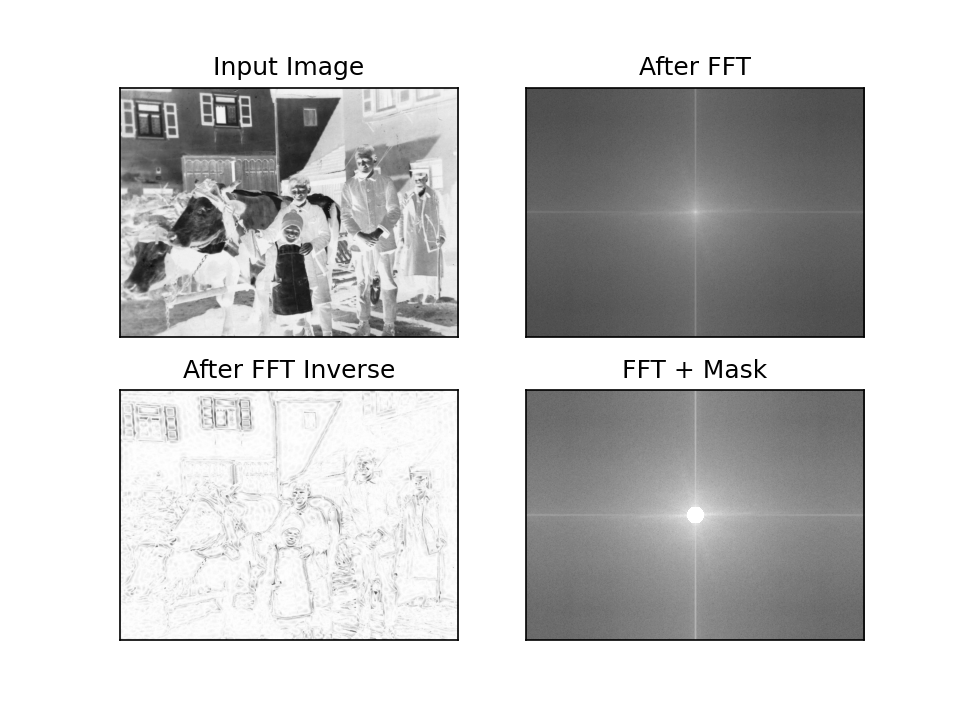

In [23]:
%matplotlib notebook
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)  # center

# Circular HPF mask, center circle is 0, remaining all ones

mask = np.ones((rows, cols, 2), np.uint8)
#mask = np.zeros((rows, cols, 2), np.uint8)
r = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
#mask[np.logical_not(mask_area)] = 0

# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)*10
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

fig, axs = plt.subplots(2,2)
#ax.plot(x,erf(x))
#ax.plot(x,np.exp(-x**2))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='Greys')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(img_back, cmap='Greys')
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()
plt.savefig('Filter.png')

<IPython.core.display.Javascript object>


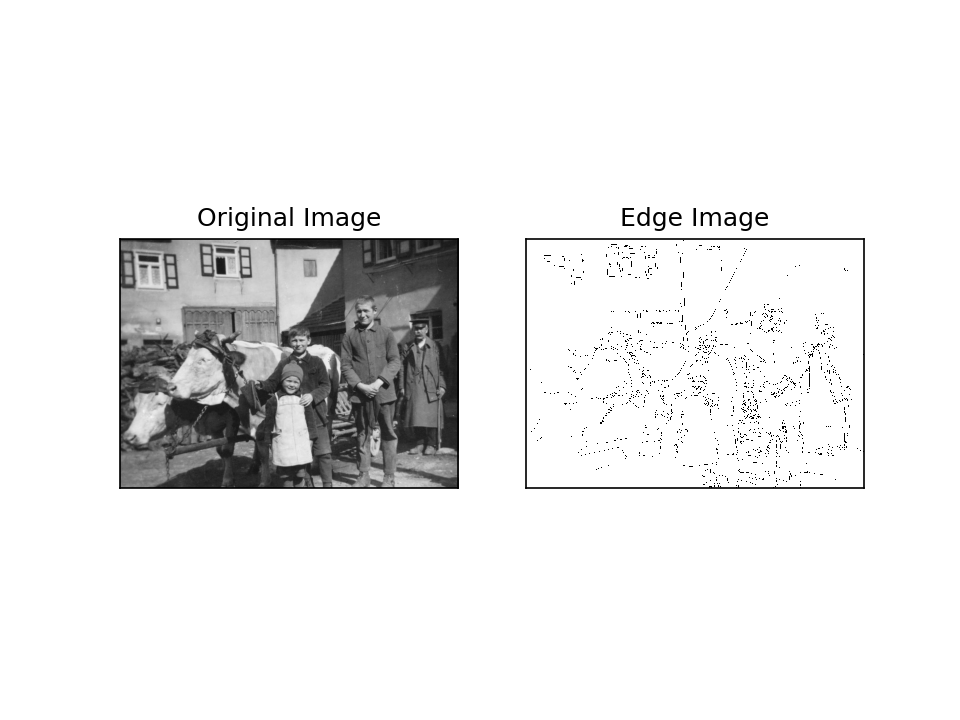

In [18]:
%matplotlib notebook
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'Greys', interpolation='nearest' )
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [ ]:
image=plt.imread('InputImage.png')
plt.imshow(image)

In [ ]:
np.logical_not(mask_area)

In [ ]:
cv2.dft?

In [ ]:
plt.imshow(edges)

In [9]:
plt.imshow(img1[:,:,2])

In [10]:
plt.imshow(img)

In [22]:
imgall.shape

(1031, 1397, 3)

In [31]:
a = np.ones((1000,1000))
a[400:600,400:600]=0
b = cv2.dft(a)
b_shift = np.fft.fftshift(b)

<IPython.core.display.Javascript object>


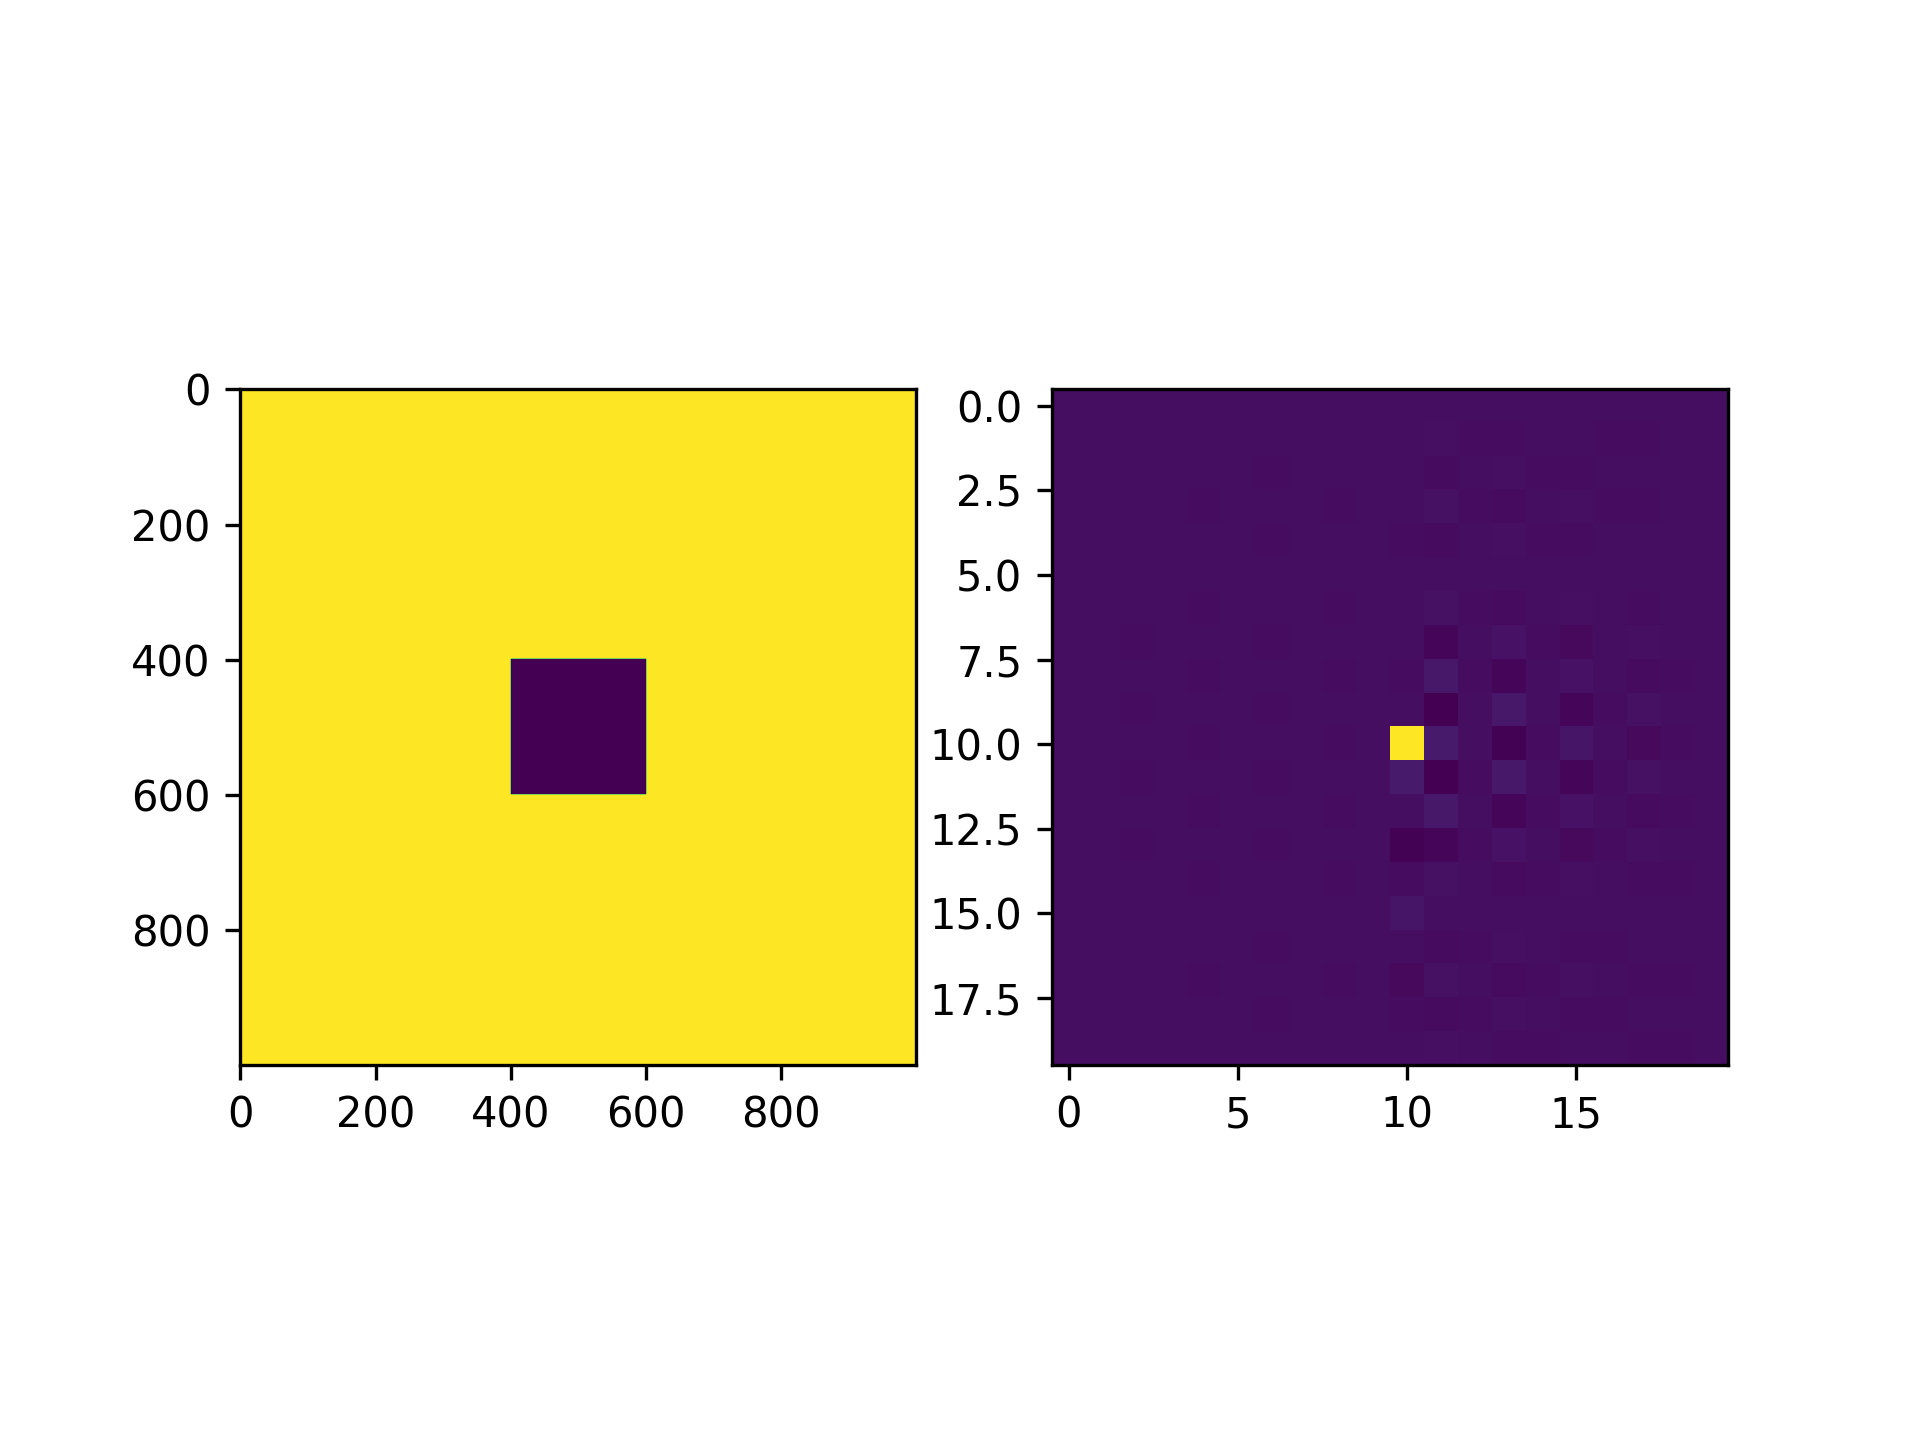

In [37]:
%matplotlib notebook
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(a)
ax2.imshow(b_shift[490:510,490:510])

<IPython.core.display.Javascript object>


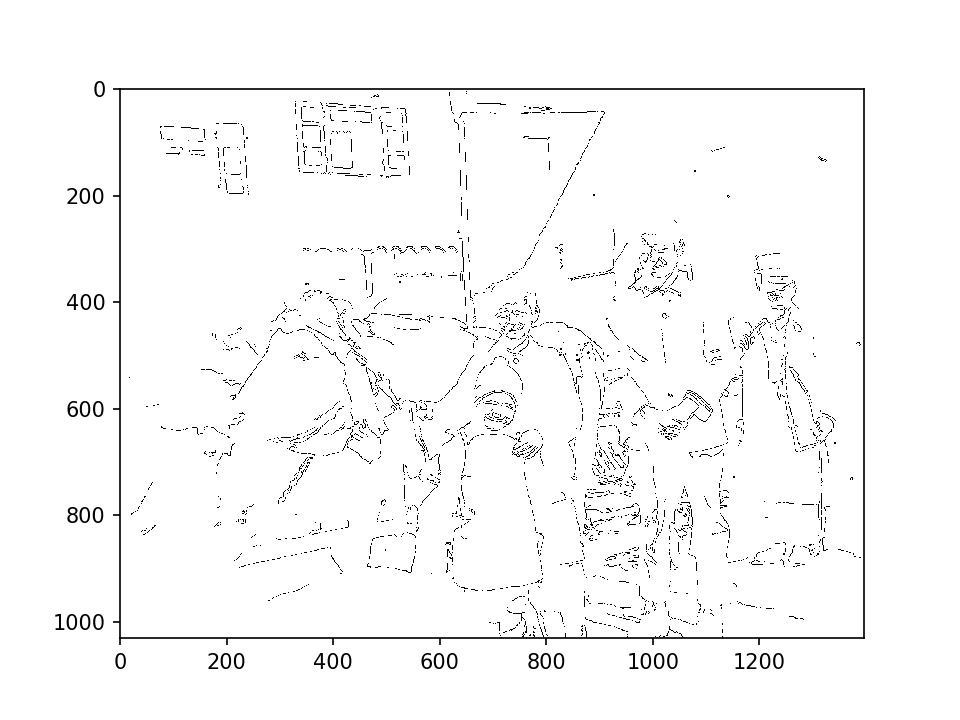

In [17]:
%matplotlib notebook 
plt.imshow(edges, cmap='Greys', interpolation='nearest')

In [11]:
hell = edges[edges > 0]
dunkel = edges[edges < 1]

In [14]:
edges[dunkel] = 255
edges[hell] = 0